In [5]:
import pandas as pd

In [7]:
import numpy as np

In [9]:
import seaborn as sns

In [11]:
df=pd.read_csv('Churn_Modelling.csv')

In [13]:
df.shape

(10000, 14)

In [15]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
x=df[['RowNumber', 'CustomerId','CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [21]:
x

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52


In [23]:
y=df['Exited']

In [25]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

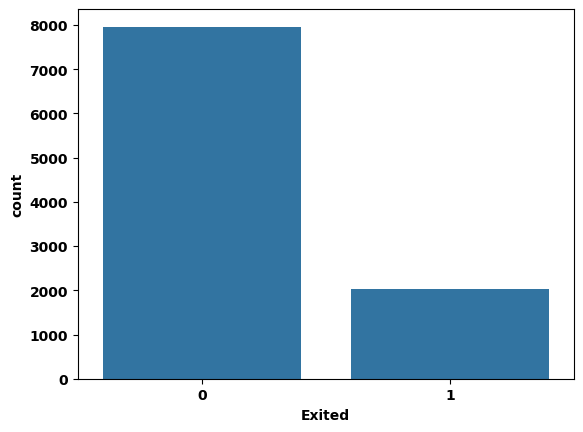

In [27]:
sns.countplot(x=y)

In [29]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [34]:
!pip install imbalanced-learn

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [33]:
ros=RandomOverSampler(random_state=42)

In [35]:
x_res, y_res= ros.fit_resample(x,y)

In [37]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [39]:
#Normalize

from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_res)

In [43]:
x_scaled

array([[-1.73505222, -0.77611568, -0.29634086, ...,  0.65193397,
         1.08456336,  0.01795652],
       [-1.73470437, -0.60003239, -0.40876865, ..., -1.53389768,
         1.08456336,  0.21254446],
       [-1.73435651, -0.98806957, -1.49216372, ...,  0.65193397,
        -0.92203005,  0.23669025],
       ...,
       [ 1.51982135,  1.71505614, -2.35070322, ...,  0.65193397,
         1.08456336, -0.33553027],
       [-0.53599813, -1.08799189, -0.02038173, ...,  0.65193397,
        -0.92203005, -0.38598925],
       [ 0.51347858, -1.37312793, -0.85847981, ..., -1.53389768,
         1.08456336,  0.20920036]])

In [45]:
# splitting
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_res,random_state=42,test_size=0.25)

In [49]:
x_res.shape

(15926, 10)

In [51]:
x_test.shape

(3982, 10)

In [53]:
x_train.shape

(11944, 10)

In [55]:
from sklearn.neural_network import MLPClassifier

In [57]:
ann= MLPClassifier(hidden_layer_sizes=(100,100,100),
                  random_state=42,
                  max_iter=100,
                  activation='relu')

In [59]:
ann.fit(x_train,y_train)

C:\Users\yashp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=42)

In [61]:
y_pred=ann.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

In [65]:
y_test.value_counts()

Exited
0    2036
1    1946
Name: count, dtype: int64

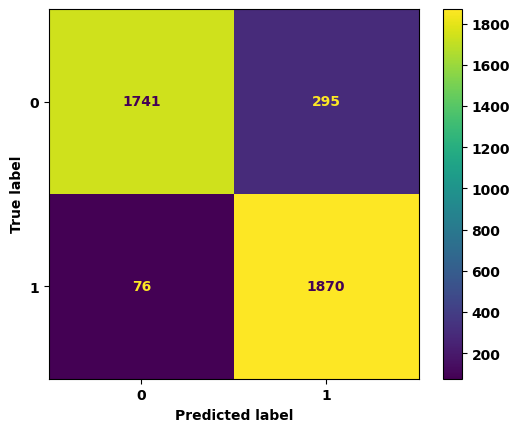

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [69]:
accuracy_score(y_test,y_pred)

0.906830738322451

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      2036
           1       0.86      0.96      0.91      1946

    accuracy                           0.91      3982
   macro avg       0.91      0.91      0.91      3982
weighted avg       0.91      0.91      0.91      3982

